In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [42]:
df_ger = pd.read_csv('Data/Germany.csv',  index_col='Year')
print(df_ger.shape)  # (123, 8)
df_ger

(172, 10)


,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Year,,,,,,,,,,
1850,Germany,DEU,15.139648,15.139648,0.000000,0.000000,0.000000,0.000000,0.000000,0.448635
1851,Germany,DEU,16.869056,16.869056,0.000000,0.000000,0.000000,0.000000,0.000000,0.495347
1852,Germany,DEU,19.173712,19.173712,0.000000,0.000000,0.000000,0.000000,0.000000,0.559163
1853,Germany,DEU,20.760224,20.760224,0.000000,0.000000,0.000000,0.000000,0.000000,0.603109
1854,Germany,DEU,24.365600,24.365600,0.000000,0.000000,0.000000,0.000000,0.000000,0.705615
...,...,...,...,...,...,...,...,...,...,...
2017,Germany,DEU,785.616471,310.763015,279.180926,171.412164,13.408148,2.266922,8.585296,9.508290
2018,Germany,DEU,754.408432,295.673550,265.224228,169.548548,13.227901,2.007493,8.726712,9.100585
2019,Germany,DEU,707.149948,240.086494,270.910415,172.478938,13.286640,2.028361,8.359100,8.504699


In [15]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df_ger, x="Year", y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

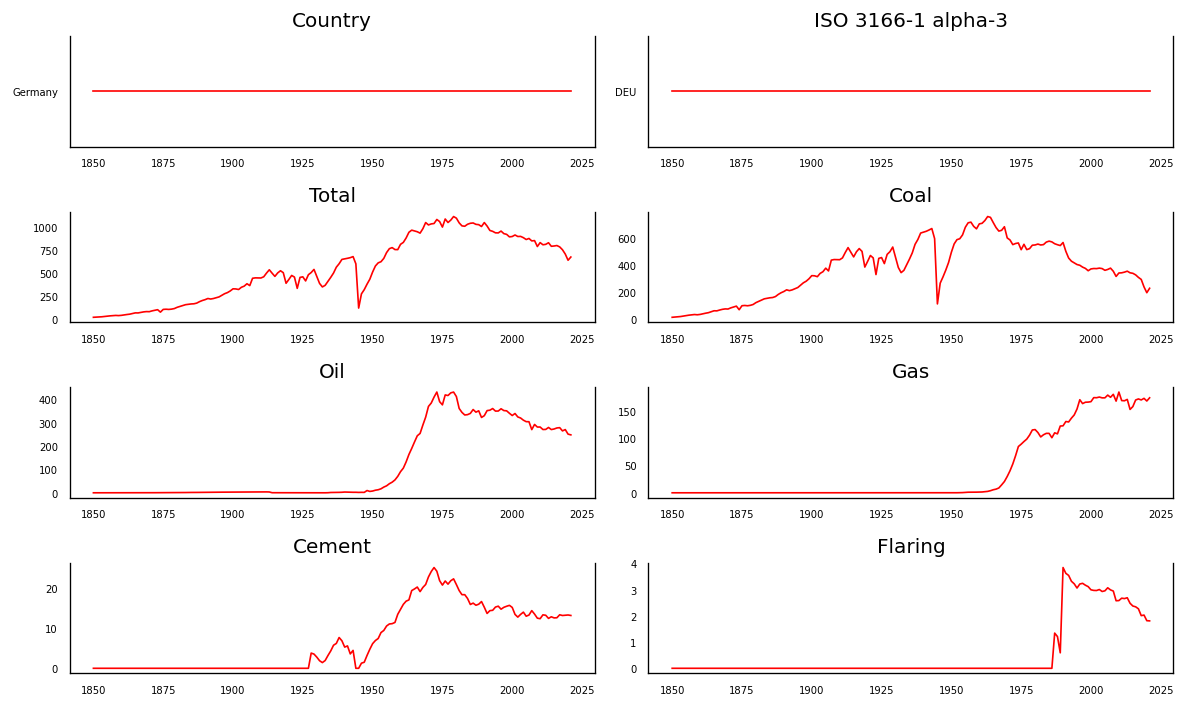

In [44]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_ger[df_ger.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_ger.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

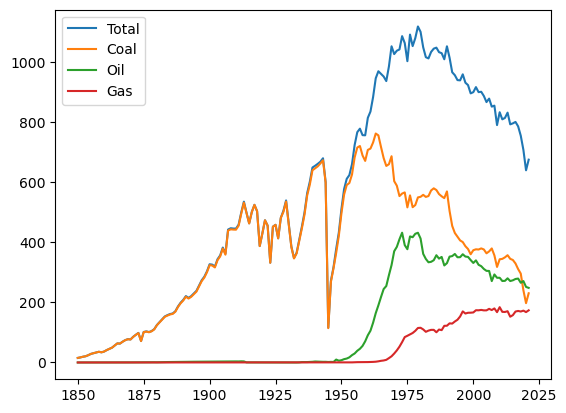

In [46]:
plt.figure()

x = df_ger.index
y1 = df_ger['Total']
y2 = df_ger['Coal']
y3 = df_ger['Oil']
y4 = df_ger['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)


plt.legend(['Total', 'Coal', 'Oil', 'Gas'])